# Annotations and Text
____

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt
import webbrowser
from IPython.display import YouTubeVideo

style.use('fivethirtyeight')


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1m/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    #(a)
    font_dict = {'family':'serif', 'color': 'dark red', 'size':15}
    ax1.text(date[10], closep[1],'Text Example', fontdict = font_dict)
    #(b)
    # note location of what is annotated in enclosed patenthesis
    ax1.annotate('Big News', (date[11], highp[11]), xytext = (0.8, 0.9), textcoords = 'axes fraction',
                arrowprops = dict(facecolor = 'grey', color = 'grey'))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('ebay')

C:\Users\PC\Miniconda2\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


AttributeError: 'module' object has no attribute 'request'

In [ ]:
webbrowser.open('https://pythonprogramming.net/annotations-text-matplotlib-tutorial/')

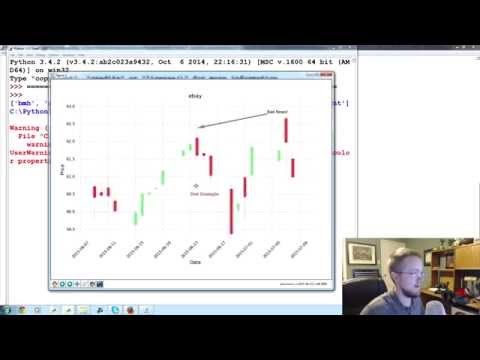

In [2]:
YouTubeVideo('xLw9wf9uNuw')

points I wrote after reading the notes on the website
1. two ways to add text to graphs (a) just place text to a location on the graph(ax1.text()) (b) specifically annotate a plot on the chart to draw attention to it(ax1.annotate()).
2. (a) Placememt of text on the graph done by specifying coordinates. The coordinate points are the data (x, y).
3. Specify coordinate then write the test to be displayed.
4. The font_dict is used to specify the font(family), color and size
5. Adding text is a method for the graph object
6. (b) first pass in annotative text, then the coordinates. That we want to point to. Then specify the location of the annotative text using xytext, this example he used 'axes fraction'. The benefit of this is that the text will stay put even if the chart is moved around. 
7. copied from website **This one will be an axes fraction. So we use 0.8 and 0.9. This means the placement of the text will be at 80% of the x axis and 90% of the y axis. This way, if we move the chart around, the text will stay at the same point."

summary from the vid
1. there are two location first what we are annotating and location of the anotative text
2. properties of the arrow are speced in a dictionary